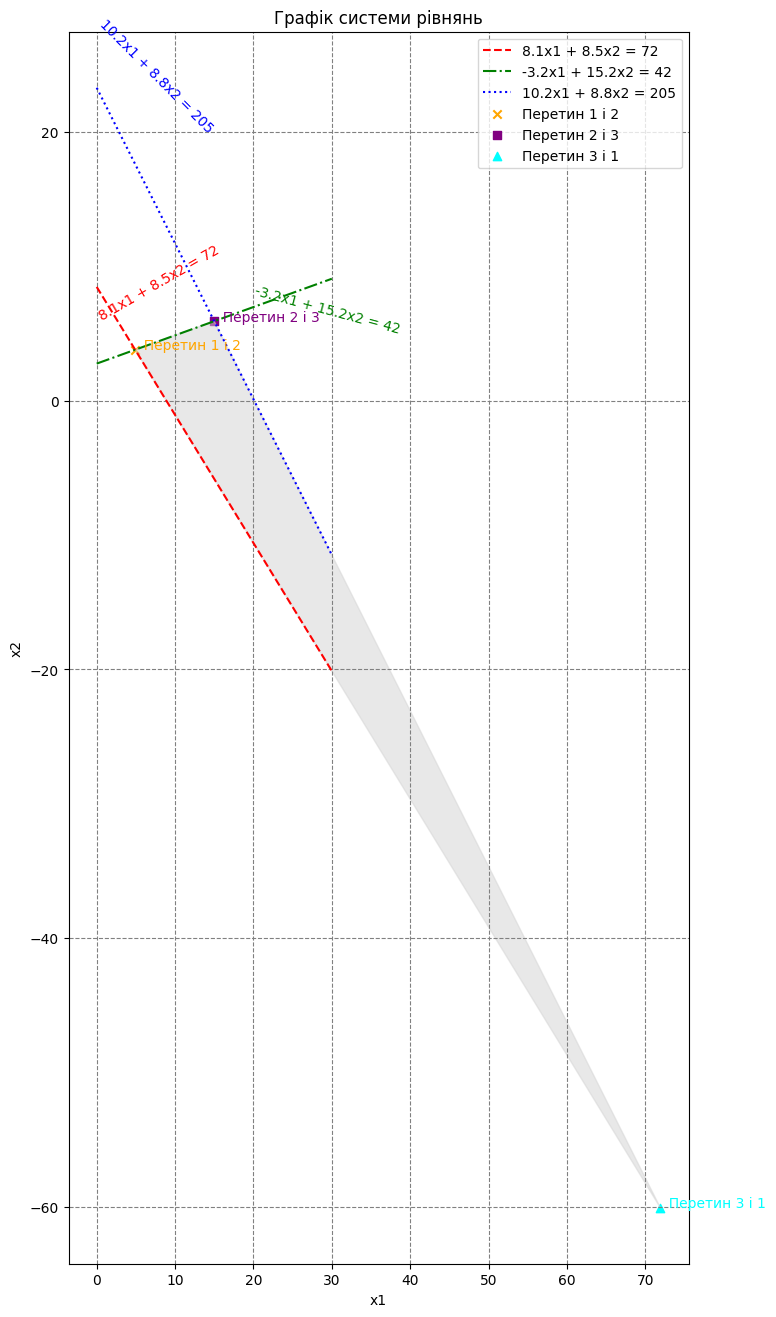

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задані системи рівнянь
A = np.array([[8.1, 8.5], [-3.2, 15.2], [10.2, 8.8]])
B = np.array([72, 42, 205])

# Розв'язання системи лінійних рівнянь
solution = np.linalg.lstsq(A, B, rcond=None)[0]

# Відображення графіків ліній та точки перетину
x1 = np.linspace(0, 30, 100)
x2_1 = (72 - 8.1 * x1) / 8.5
x2_2 = (42 + 3.2 * x1) / 15.2
x2_3 = (205 - 10.2 * x1) / 8.8

# Знаходження точок перетину між рівняннями
intersection_12 = np.linalg.lstsq(np.vstack([A[0], A[1]]), np.hstack([B[0], B[1]]), rcond=None)[0]
intersection_23 = np.linalg.lstsq(np.vstack([A[1], A[2]]), np.hstack([B[1], B[2]]), rcond=None)[0]
intersection_31 = np.linalg.lstsq(np.vstack([A[2], A[0]]), np.hstack([B[2], B[0]]), rcond=None)[0]

# Визначення вершин трикутника для заливки
triangle_vertices = np.array([intersection_12, intersection_23, intersection_31])

plt.figure(figsize=(8, 16), dpi=100)

plt.plot(x1, x2_1, color='red', linestyle='dashed', label='8.1x1 + 8.5x2 = 72')
plt.plot(x1, x2_2, color='green', linestyle='dashdot', label='-3.2x1 + 15.2x2 = 42')
plt.plot(x1, x2_3, color='blue', linestyle='dotted', label='10.2x1 + 8.8x2 = 205')

plt.scatter(intersection_12[0], intersection_12[1], color='orange', marker='x', label='Перетин 1 і 2')
plt.scatter(intersection_23[0], intersection_23[1], color='purple', marker='s', label='Перетин 2 і 3')
plt.scatter(intersection_31[0], intersection_31[1], color='cyan', marker='^', label='Перетин 3 і 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Графік системи рівнянь')
plt.legend()
plt.grid(True, linestyle='--', color='gray')

# Заповнення трикутника
plt.fill(triangle_vertices[:, 0], triangle_vertices[:, 1], color='lightgray', alpha=0.5)

# Підписи рівнянь прямих
plt.text(0, 6, '8.1x1 + 8.5x2 = 72', color='red', rotation=30)
plt.text(20, 5, '-3.2x1 + 15.2x2 = 42', color='green', rotation=-15)
plt.text(0, 20, '10.2x1 + 8.8x2 = 205', color='blue', rotation=-45)

# Вказівки на точки перетину
plt.text(intersection_12[0], intersection_12[1], '  Перетин 1 і 2', color='orange')
plt.text(intersection_23[0], intersection_23[1], '  Перетин 2 і 3', color='purple')
plt.text(intersection_31[0], intersection_31[1], '  Перетин 3 і 1', color='cyan')

plt.savefig('plot.jpg')

plt.show()